In [1]:
def Infix2Postfix(Infix):
  output = list()
  stack = list()
  priority = {"~":5, "&":4, "|":3, ">":2, "=":1}

  for c in Infix:
    if(c.isalpha()):
      output.append(c)
    elif(c == '('):
      stack.append(c)
    elif(c == ')'):
      while stack and stack[-1] != '(':
        output.append(stack.pop())
      if stack and stack[-1] == '(':
        stack.pop()
    else:
      while stack and stack[-1] != '(' and priority.get(c) <= priority.get(stack[-1]):
        output.append(stack.pop())
      stack.append(c)

  while stack:
    output.append(stack.pop())

  return "".join(output)

print(Infix2Postfix("~(A|B)>C"))

AB|~C>


In [2]:
import itertools

def Postfix2TruthTable(Postfix):
  variables = sorted(set(token for token in Postfix if token.isalpha()))
  print("|".join(variables) + "|Result")
  print((4 * len(variables) + 9) * '-')

  for i in itertools.product([True, False], repeat=len(variables)):
    env = dict(zip(variables, i))
    stack = list()

    for k in Postfix:
      if(k.isalpha()):
        stack.append(env[k])
      elif(k == '~'):
        a = stack.pop()
        stack.append(not a)
      elif(k == '|'):
        b = stack.pop()
        a = stack.pop()
        stack.append(a or b)
      elif(k == '&'):
        b = stack.pop()
        a = stack.pop()
        stack.append(a and b)
      elif(k == '>'):
        b = stack.pop()
        a = stack.pop()
        stack.append((not a) or b)
      elif(k == '='):
        b = stack.pop()
        a = stack.pop()
        stack.append(a == b)
      else:
        break

    result = stack.pop()
    row = "|".join('T' if v else 'F' for v in i)
    print(f"{row}|{'T' if result else 'F'}")

testCase = "(P|~Q)>~P=(P|(~Q))>~P"

print(Postfix2TruthTable(Infix2Postfix(testCase)))


P|Q|Result
-----------------
T|T|T
T|F|T
F|T|T
F|F|T
None


In [41]:
import csv

listOfStudent = list()

with open('dataset.csv', mode='r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    listOfStudent = [row for row in reader]


def LogicalQuantifiedStatement(statement: str):
    def is_passing(student): return all(float(student.get(subj)) >= 5.0 for subj in ['Math', 'CS', 'Eng'])
    def is_high_math(student): return float(student.get('Math')) >= 9.0
    def is_struggling(student): return float(student.get('Math')) < 6.0 and float(student.get('CS')) < 6.0
    def improved_in_cs(student): return float(student.get('Math')) < float(student.get('CS'))
    def math_higher_than_3(student): return float(student.get('Math')) > 3.0

    
    quantifier_all_flag = any(q in statement for q in ["for all", "all", "for every", "every"])
    quantifier_any_flag = any(q in statement for q in ["exists", "there exists", "some", "at least one", "exist"])
    

    quantifier = list()

    if quantifier_all_flag:
        quantifier.append(all)
    if quantifier_any_flag:
        quantifier.append(any)

    negated = any(word in statement for word in ["not", "no", "did no", "does not", "n't"])

    if len(quantifier) > 1:
        if "For every" and "exists a subject in which they scored above 6":
            return all(any(
                float(x.get(subj)) > 6.0
                for subj in ["Math", "CS", "Eng"]
            ) for x in listOfStudent)
        if "For every student scoring below 6 in math" and "exists a subject where they scored above 6":
            return all((x.get('Math') >= 6.0 or any(x.get(subj) > 6.0 for subj in ["CS", "Eng"])) for x in listOfStudent)
                
    else:
        if "passed all" in statement:
            predicate = is_passing
        elif "math score higher than 3" in statement:
            predicate = math_higher_than_3
        elif "scored above 9 in math" in statement:
            predicate = is_high_math
        elif "improved in CS" in statement:
            predicate = improved_in_cs
        elif "scored above 6":
            predicate = is_struggling


    result = quantifier[0](predicate(x) for x in listOfStudent)
    return not result if negated else result

LogicalQuantifiedStatement("there does not exist a student who scored above 9")

False

In [55]:
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import serialization, hashes

def generate_keys():
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048
    )
    public_key = private_key.public_key()
    return private_key, public_key

def encrypt(public_key, message):
    ciphertext = public_key.encrypt(
        message.encode(),
        padding.OAEP(
            mgf = padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None,
        )
    )
    return ciphertext

def decrypt(private_key, ciphertext):
    plainText = private_key.decrypt(
        ciphertext,
        padding.OAEP(
            mgf = padding.MGF1(algorithm=hashes.SHA256()),
            algorithm = hashes.SHA256(),
            label = None,
        )
    )
    return plainText.decode()

private_key, public_key = generate_keys()

In [63]:
test_case_msg = [
    "Hello world!",
    "Hi, I'm Pham Nguyen Khanh Dang",
    "-.- .- . .-.. .- / -.- --- ...- .- .-.. ... -.- .. .- / .. ... / -- -.-- / --- ... .... .."
    "Fatty Oguri cap",
    "Special week",
    "Silence Suzuka"
]

test_success_percent = int()
test_failed_percent = int()

for testCase in test_case_msg:
    cipherText = encrypt(public_key, testCase)
    plainText = decrypt(private_key, cipherText)
    if plainText == testCase:
        test_success_percent += 1
    else:
        test_failed_percent += 1

print("Success rate: %d" % (test_success_percent))
print("Failed rate: %d" % (test_failed_percent))
print("Failed percent: %.2f" % ((test_failed_percent / float(test_success_percent))))

Success rate: 5
Failed rate: 0
Failed percent: 0.00


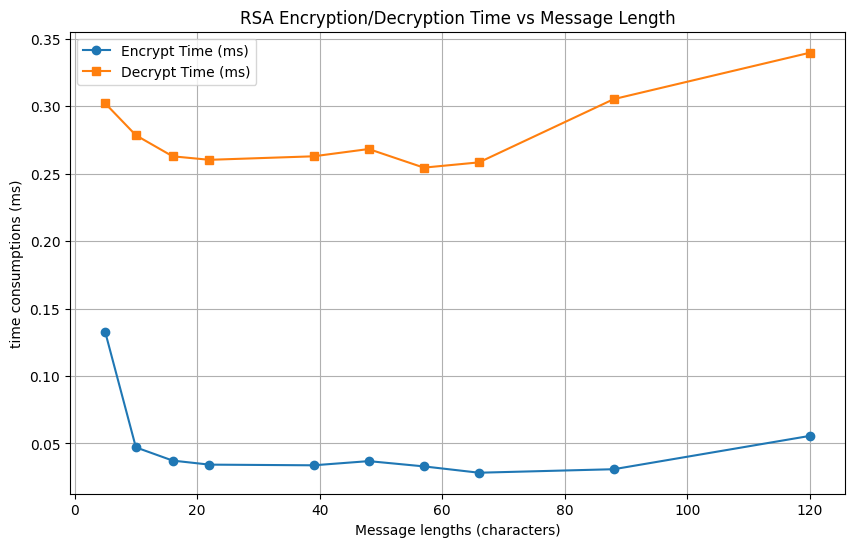

In [69]:
import matplotlib.pyplot as plt
import time

sample_text = [
    "Hello",
    "Hello RSA!",
    "Encrypt this msg",
    "Message length: twenty",
    "This is a sample message length thirty.",
    "This message contains exactly forty characters!!",
    "Fifty characters long message used for RSA timing test!!!",
    "Sixty char message for evaluating RSA performance accurately here.",
    "This is an eighty-character long message used to analyze how RSA encryption time scales.",
    "This one is a one-hundred-character test message to help you benchmark RSA encryption and decryption timings accurately."
]

encrypt_excuse_time = {}
decrypt_excuse_time = {}

for text in sample_text:
    text_length = len(text)

    start_enc = time.perf_counter()
    ct = encrypt(public_key, text)
    end_enc = time.perf_counter()

    start_dec = time.perf_counter()
    pt = decrypt(private_key, ct)
    end_dec = time.perf_counter()

    assert pt == text, "Decryption failed!"

    encrypt_excuse_time[text_length] = round((end_enc - start_enc)*1000, 5)
    decrypt_excuse_time[text_length] = round((end_dec - start_dec)*1000, 5)

lengths = sorted(encrypt_excuse_time.keys())
encrypt_times = [encrypt_excuse_time[l] for l in lengths]
decrypt_times = [decrypt_excuse_time[l] for l in lengths]

plt.figure(figsize=(10,6))

plt.plot(lengths, encrypt_times, marker='o', label="Encrypt Time (ms)")
plt.plot(lengths, decrypt_times, marker='s', label="Decrypt Time (ms)")

plt.title("RSA Encryption/Decryption Time vs Message Length")
plt.xlabel("Message lengths (characters)")
plt.ylabel("time consumptions (ms)")
plt.grid()
plt.legend()
plt.show()